In [1]:
!pip install scikit-learn pandas matplotlib seaborn

In [2]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [3]:
import pandas as pd

df = pd.read_csv("data.csv")  # Đổi tên nếu cần

In [4]:
# Loại bỏ cột STT
df = df.drop(columns=["STT"])

# Đổi tên các cột có dấu hoặc ký tự lạ
df.columns = ['c', 'L', 'gamma', 'h', 'u', 'phi', 'beta', 'FS', 'Nhan']

# Kiểm tra giá trị unique trong nhãn
print(df['Nhan'].value_counts())

# Mã hóa nhãn dạng số
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Nhan'])

# Chuẩn hóa đầu vào
from sklearn.preprocessing import StandardScaler
features = ['c', 'L', 'gamma', 'h', 'u', 'phi', 'beta', 'FS']
X = df[features]
y = df['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Nhan
An toàn        487
Co dau hieu    382
Nguy co cao    241
Name: count, dtype: int64


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

     An toàn       1.00      1.00      1.00        97
 Co dau hieu       1.00      1.00      1.00        77
 Nguy co cao       1.00      1.00      1.00        48

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222



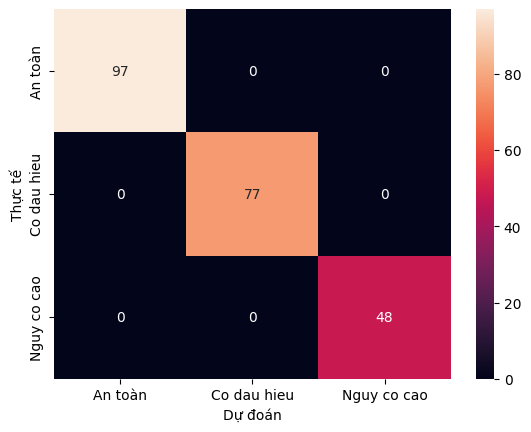

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()


In [8]:
import joblib
joblib.dump(model, 'mo.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

In [11]:
import joblib

# Tải mô hình, bộ chuẩn hóa và encoder
model = joblib.load('mo.pkl')
scaler = joblib.load('scaler.pkl')
label_encoder = joblib.load('label_encoder.pkl')

In [12]:
import numpy as np

def du_bao_sat_lo(input_data):
    """
    input_data: list hoặc array gồm 8 thông số theo thứ tự:
        [c, L, gamma, h, u, phi, beta, FS]
    """
    # Chuyển thành dạng array và chuẩn hóa
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)

    # Dự đoán nhãn
    label_pred = model.predict(input_scaled)[0]
    label_name = label_encoder.inverse_transform([label_pred])[0]

    return label_name


In [13]:
# Ví dụ: đất có các thông số như sau
# c = 30, L = 50, gamma = 20.1, h = 12.5, u = 6.3, phi = 28.5, beta = 20.5, FS = 1.23
input_mau = [30, 50, 20.1, 12.5, 6.3, 28.5, 20.5, 1.23]
ket_qua = du_bao_sat_lo(input_mau)
print(f"Dự báo sạt lở: {ket_qua}")


Dự báo sạt lở: Co dau hieu


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
from google.colab import files

files.download("mo.pkl")
files.download("scaler.pkl")
files.download("label_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>